# Assignment 1 - Axelrods tournament

#### When you have finished <font color="red">download this page as an IP Notebook file</font> (File -> Download as -> IPython Notebook (.ipynb) ) and then upload to WOLF by midnight on Friday 17/11/2017

#### <font color="purple">Please enter your Student Number in the space provided below</font>

1828442

Implement a series of player/agents to play the prisoners dilemma against each other for Axelrod’s tournament and see which strategy performs the best overall.  This assignment is worth <b>40%</b> of the module.<br>Below is the code for a very simple player use this as a template for the design of your other players.  

<font color="red"><b>Q-1:</b></font><font color="purple">You will devise and add your tournament players in the space below.  You should produce a minimum of 6 different strategies, comment your code to indicate the name or nature of the strategy.</font> <b> (4 marks each)</b><br><br>Each player should be in a class name prefixed with the name Player, so if your player is to be called <b><font color="purple">Bond</font></b> your class name should be Player<b><font color="purple">Bond</font></b>.  Each player class should contain one method with the prototype<br> 
&emsp;&emsp;&emsp;&emsp;<b><font color="blue">move</font>(<font color="red">self, history</font>)</b><br>The history parameter gives two lists the history of player's moves against the current opponent and the history of the opponent's aginst the player. The method should also <b><font color="blue">return</font></b> either a <b><font color="green">'C'</font></b> or a <b><font color="green">'D'</font></b> for cooperate or defect respectively. <i>Note: You can place multiple Player classes in the space provided below.</i> 

<font color="red"><b>Solution:-

In [14]:
## Player simply plays Defect on every rounds
class PlayerAlwaysDefect:

    def move(self, history):
        
        return 'D'

In [15]:
#Player Cooperates on the first move, and deflects after receiving a (D&D) or (D&C).
class PlayerDDorDC:

    def move(self, history):
        
        mine, theirs = history
        
        try:
            if (theirs[-1] == 'D' and theirs[-2] == 'D') or (theirs[-1] == 'D' and theirs[-2] == 'C') :
                return 'D'
            else:
                return 'C'
        except:
            return 'C'

In [16]:
## This player cooperate only when length of mine is divisible by 3. otherwise it plays defect 
class PlayerThree:
    
    def move(self, history):
        mine, theirs = history
        
        if len(mine) % 3 == 0:
            return 'C'
        else:
            return 'D'

In [17]:
## This player first play cooperate then 
## simply alternates the decision in each rounds i.e if opponent plays C player plays D and vice versa.
class PlayerOpposite:

    def move(self, history):
        mine,theirs = history
        try:
            if theirs[-1] == 'D':
                return 'C'
            else:
                return 'D'
        except:
            return 'C'

In [18]:
## Player plays alternetly i.e Defect and cooperate only
class PlayerAlternet:

    def move(self, history):
        mine, theirs = history
         
        if len(mine) % 2 != 0:
            return 'D'
        else:
            return 'C'

In [19]:
## Player simply plays Cooperate on every rounds
class PlayerAlwaysCooperate:

    def move(self, history):
        
        return 'C'

The code below is a modified version of Allen B. Downey's program to play Axelrods tournament in IPython notepad.  The player code is now read from classes in memory rather than local files and a score for each agent as follows:<br> - 3 if they both cooperate<br> - 1 if they both defect<br> - 5 if a player defects against a cooperating player and<br> - 0 if a player cooperates against a defecting player.

In [20]:
""" 
Code example by Allen B. Downey 
from Complexity and Computation (2011).  
Modified by D. Case to work in IPython notebook.
"""
## The following are methods/functions/operators that 
## it is safe to use, if required, in your agent  
safe_builtins = """
abs divmod staticmethod
all enumerate int ord str
any isinstance pow sum
basestring issubclass print super
bin iter property tuple
bool filter len range type
bytearray float list unichr
callable format reduce unicode
chr frozenset long vars
classmethod getattr map repr xrange
cmp max reversed zip
compile hasattr round
complex hash min set apply
delattr help next setattr buffer
dict hex object slice coerce
id oct sorted intern
"""
class Player(object):
    """Represents a player.

    Attributes:
      filename: file the code was read from
      globs: global environment used to execute code
      locs: local environment used to execute code
    """
    def __init__(self, filename):
        self.filename = filename
        self.globs = self.make_globals()
        self.locs = self.make_locals()
        self.move = filename.move
        self.total = 0

    def add(self, inc):
        self.total += inc

    def make_globals(self):
        """Make the global environment."""
        try:
            t = [(k, __builtins__[k]) for k in safe_builtins.split()]
        except TypeError:
            t = [(k, getattr(__builtins__, k)) for k in safe_builtins.split()]
        safe_dict = dict(__builtins__=dict(t))

        safe_list = ['math', 'random']
        t = [(k, globals().get(k)) for k in safe_list]
        safe_dict.update(t)

        return safe_dict

    def make_locals(self):
        """Make the local environment."""
        return dict()

class Referee(object):
    def __init__(self, player_dir='.'):
        self.player_dir = player_dir

    def find_players(self, pattern='Player*.py'):
        """Find files that match pattern and read players.

        Returns a list of Player objects.
        """
        filenames = [val for nm, val in globals().iteritems() if len(nm) > 6 and nm[:6] == 'Player']
        filenames.sort()

        players = []
        for className in filenames:
            player = Player(className())
            players.append(player)

            move = getattr(player, 'move', None)
            if not move:
                print '%s has no move method.' % className

        return players

    def run_tournament(self, players, n=50):
        """Run a tournament that runs each player against the others.

        Returns an array of scores.
        """
        results = {}
        if len(players) == 1:
            self.run_head_to_head(players[0], players[0], n*2)
            return
        for player1 in players:
            for player2 in players:
                if player1 == player2:
                    continue
                self.run_head_to_head(player1, player2, n)
        for player1 in players:
            results[player1.filename.__class__.__name__] = player1.total
        return results

    def run_head_to_head(self, player1, player2, n=50):
        """Run players against each other n times.

        Returns a pair of scores.
        """
        moves1 = []
        moves2 = []
        for i in xrange(n):
            move1, move2 = self.one_round(player1, player2, moves1, moves2)
            moves1.append(move1)
            moves2.append(move2)

    def one_round(self, player1, player2, moves1, moves2):
        """Plays one round and updates the scores.

        Returns the players' moves.
        """
        move1 = self.call(player1, (moves1, moves2))
        move2 = self.call(player2, (moves2, moves1))
        if move1 == move2:
            if move1 == 'C':
                score = 3
            else:
                score = 1
            player1.add(score)
            player2.add(score)
        elif move1 == 'C' and move2 == 'D':
            player2.add(5)
        elif move1 == 'D' and move2 == 'C':
            player1.add(5)
        return move1, move2

    def call(self, player, history):
        """Calls the player's move function and returns the result."""
        player.locs['history'] = history
        decision = player.move(history)
        return decision

## Note: the main routine returns a dictionary 
## of results once the simulation has completed
def main(n=100):
    ref = Referee()
    players = ref.find_players()
    return ref.run_tournament(players, n)

Calling main routine runs the tournament, the optional parameter specifies the number of rounds played between each pair of players, the default is 100.  The main routine returns a dictionary of results with the performance score for each player agent. For example:<br>&emsp;&emsp;<b><font color="green">{'PlayerGrouch': 404, 'PlayerFlipper': 222, 'PlayerPollyanna': 78}</font></b><br>You <font color="red">should also experiment with different numbers of rounds</font> to observe if the relative performance of the players changes. 

In [21]:
## call main to run the tournament
remark_10=main(10)
print ("Tournament run for 10 times:",remark_10)

remark_50=main(50)
print ("Tournament run for 50 times:",remark_50)

remark_100 = main(100)
print ("Tournament run for 100 times:",remark_100)


remark_200 = main(200)
print ("Tournament run for 200 times:",remark_200)

remark_300=main(300)
print ("Tournament run for 300 times:",remark_300)


('Tournament run for 10 times:', {'PlayerAlternet': 224, 'PlayerThree': 246, 'PlayerAlwaysDefect': 348, 'PlayerOpposite': 218, 'PlayerAlwaysCooperate': 120, 'PlayerDDorDC': 206})
('Tournament run for 50 times:', {'PlayerAlternet': 1074, 'PlayerThree': 1250, 'PlayerAlwaysDefect': 1652, 'PlayerOpposite': 1064, 'PlayerAlwaysCooperate': 558, 'PlayerDDorDC': 1062})
('Tournament run for 100 times:', {'PlayerAlternet': 2144, 'PlayerThree': 2496, 'PlayerAlwaysDefect': 3288, 'PlayerOpposite': 2116, 'PlayerAlwaysCooperate': 1110, 'PlayerDDorDC': 2144})
('Tournament run for 200 times:', {'PlayerAlternet': 4274, 'PlayerThree': 5000, 'PlayerAlwaysDefect': 6552, 'PlayerOpposite': 4232, 'PlayerAlwaysCooperate': 2208, 'PlayerDDorDC': 4290})
('Tournament run for 300 times:', {'PlayerAlternet': 6406, 'PlayerThree': 7506, 'PlayerAlwaysDefect': 9816, 'PlayerOpposite': 6346, 'PlayerAlwaysCooperate': 3306, 'PlayerDDorDC': 6438})


<font color="red"><b>Q-2:</b></font><font color="purple">The results would be better presented in a bar chart.  Is it possible to produce a bar chart in matplotlib?  <i><b>(Hint: Yes it is)</b></i>.  Research (prio ) how to produce a bar chart in matplotlib and in the space below take the output from running main to produce the plot.</font> <b> (6 marks)</b>

<font color="red"><b>Solution:-

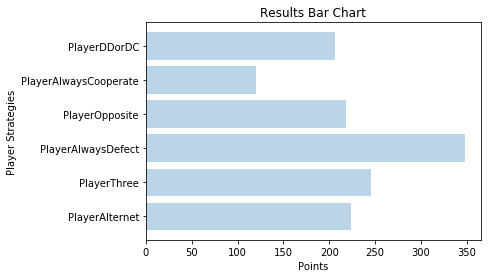

In [22]:
import matplotlib.pyplot as plt
plt.barh(range(len(remark_10)), list(remark_10.values()), align='center', alpha=0.3)
plt.yticks(range(len(remark_10)), list(remark_10.keys()))

#adds the title and x axis and y axis label
plt.title('Results Bar Chart')
plt.xlabel('Points')
plt.ylabel('Player Strategies')
plt.show()


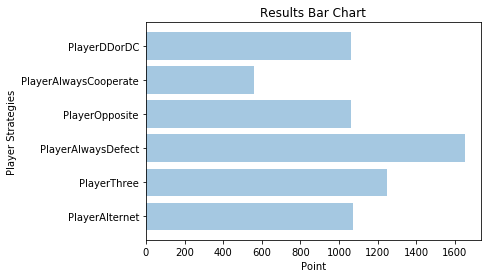

In [23]:
import matplotlib.pyplot as plt
plt.barh(range(len(remark_50)), list(remark_50.values()), align='center', alpha=0.4)
plt.yticks(range(len(remark_50)), list(remark_50.keys()))

#adds the title and x axis and y axis label
plt.title('Results Bar Chart')
plt.xlabel('Point')
plt.ylabel('Player Strategies')
plt.show()


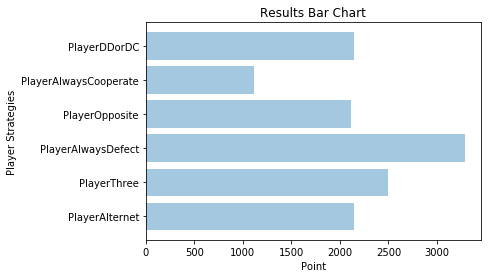

In [24]:
import matplotlib.pyplot as plt
plt.barh(range(len(remark_100)), list(remark_100.values()), align='center', alpha=0.4)
plt.yticks(range(len(remark_100)), list(remark_100.keys()))

#adds the title and x axis and y axis label
plt.title('Results Bar Chart')
plt.xlabel('Point')
plt.ylabel('Player Strategies')
plt.show()


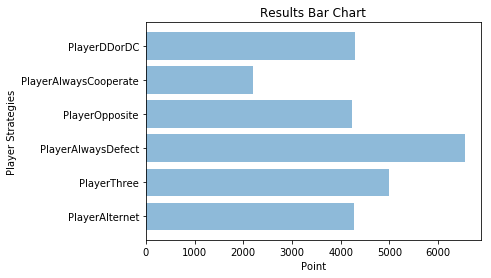

In [25]:
import matplotlib.pyplot as plt
plt.barh(range(len(remark_200)), list(remark_200.values()), align='center', alpha=0.5)
plt.yticks(range(len(remark_200)), list(remark_200.keys()))

#adds the title and x axis and y axis label
plt.title('Results Bar Chart')
plt.xlabel('Point')
plt.ylabel('Player Strategies')
plt.show()


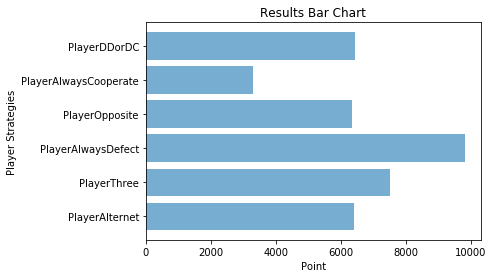

In [26]:
import matplotlib.pyplot as plt
plt.barh(range(len(remark_300)), list(remark_300.values()), align='center', alpha=0.6)
plt.yticks(range(len(remark_300)), list(remark_300.keys()))

#adds the title and x axis and y axis label
plt.title('Results Bar Chart')
plt.xlabel('Point')
plt.ylabel('Player Strategies')
plt.show()


<font color="red"><b>Q-3:</b></font><font color="purple">Comment on the the most successful strategy found. Include a brief explanation of why this strategy has been successful and the number of rounds to achieve this performance.</font>  <b> (6 marks)</b>

<font color="red"><b>Solution:-

- I have written six strategies that were used for playing the axelrods tournament among them PlayerAlwaysDefect turned out to be the best because in this strategy player simply plays Defect on every rounds as PlayerAlwaysDefect scored high points at the end of every 10, 50, 100, 200, 300 rounds in same way other strategy like PlayerThree is in second place and PlayerAlternate is in third place and so on. When the every round was played PlayerAlwaysDefect scored high points which is the highest among other strategies.

- PlayerAlwaysDefect wins in all rounds because it always scores 1,3 or 5. 

- PlayerThree in in second place because it plays cooperate only when the length of result is divisible
by three otherwise plays defect. Which is always greater then number of cooperates does in this strategy and so on.




<font color="red"><b>Q-4:</b></font><font color="purple">Including a brief explanation, give the asymptotic (big-O) times for the run_tournament (a) and run_head_to_head methods (b) in the Referee class?</font>  <b> (2 marks each)</b>

<font color="red"><b>Solution:-

    asymptotic time
a) The run_tournament() has complexity of asympotic(big-O) of O(n^2) because it run a tournament that runs each player against the others and two for loops were used.

b) The run_head_to_head methods() has complexity of asympotic(big-O) of O(n) because it run players against each other n times and one for loop is used.

Note: This is an <b>individual assignment</b>; sharing your work with colleagues or passing off the work of others as your own is plagiarism and will harm your chance to successfully complete this module. 